In [ ]:
import numpy as np
import os

import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl


print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

Tensorflow version -> 2.17.0
Keras version -> 3.4.1


### Clear GPU

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
import tensorflow as tf
from numba import cuda
import gc

def clear_memory():
    # Clear VRAM
    tf.keras.backend.clear_session()
    cuda.select_device(0)
    cuda.close()

    # Clear RAM
    gc.collect()

#This should clear the VRAM and RAM
clear_memory()

### Import the Datasets in my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
training_set_path = '/content/drive/My Drive/[2024-2025] AN2DL/Homework 1'
folder_path = '/content/drive/My Drive/Datasets'

### Check GPU Existence and Status




In [ ]:
import tensorflow as tf

# List all GPUs TensorFlow detects
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow detected the following GPU(s):")
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"Name: {details['device_name']}")

TensorFlow detected the following GPU(s):
Name: NVIDIA GeForce RTX 2070 SUPER


I0000 00:00:1731609535.360732    5136 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [ ]:
#This is to check GPU-Status and Usage (works only for NVIDIA GPUs)
!nvidia-smi

physical_devices = tf.config.list_physical_devices('GPU')
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

Thu Nov 14 19:38:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070 ...    Off |   00000000:01:00.0  On |                  N/A |
|  0%   49C    P5             56W /  215W |     782MiB /   8192MiB |     39%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Check Tensorflow and Keras Version


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

### Import all the libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
import keras as tfk
from keras import layers as tfkl
from keras import regularizers

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

#Number of Classes in the Dataset
num_classes = 8

2.17.1


### Create a function to Load Data and load the datasets needed


In [ ]:
def load_data(path):
    # Load dataset from .npz file
    data = np.load(path)

    # Trim dataset to the first 11959 entries and discard the rest
    train_dataset = data['images'][:11959].copy()  # Copy to ensure no reference to the original array
    test_dataset = data['labels'][:11959].copy()

    # Explicitly delete the original data to free up memory
    del data

    return train_dataset, test_dataset

In [ ]:
# Execute function and load data
(X_test, y_test) = load_data(training_set_path + "/" +"training_set.npz")

print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug, y_test_aug) = load_data(folder_path + "/" +"augmented_set.npz")

print("Test set shape (images):", X_test_aug.shape)
print("Test set shape (labels):", y_test_aug.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug2, y_test_aug2) = load_data(folder_path + "/" +"augmented_set2.npz")

print("Test set shape (images):", X_test_aug2.shape)
print("Test set shape (labels):", y_test_aug2.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug3, y_test_aug3) = load_data(folder_path + "/" +"augmented_set3.npz")

print("Test set shape (images):", X_test_aug3.shape)
print("Test set shape (labels):", y_test_aug3.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug4, y_test_aug4) = load_data(folder_path + "/" +"augmented_set4.npz")

print("Test set shape (images):", X_test_aug4.shape)
print("Test set shape (labels):", y_test_aug4.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug6, y_test_aug6) = load_data(folder_path + "/" +"augmented_set6.npz")

print("Test set shape (images):", X_test_aug6.shape)
print("Test set shape (labels):", y_test_aug6.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_kmeans, y_test_kmeans) = load_data(folder_path + "/" +"kmeans_dataset.npz")

print("Test set shape (images):", X_test_kmeans.shape)
print("Test set shape (labels):", y_test_kmeans.shape)

Test set shape (images): (11950, 96, 96, 3)
Test set shape (labels): (11950, 96, 96)


### Different Combination of Datasets

In [ ]:
# Create different type of concatenations of the datasets
X_test_concat = np.concatenate((X_test, X_test_aug), axis=0)
y_test_concat = np.concatenate((y_test, y_test_aug), axis=0)

print("Test set shape (images):", X_test_concat.shape)
print("Test set shape (labels):", y_test_concat.shape)

Test set shape (images): (23918, 96, 96, 3)
Test set shape (labels): (23918, 1)


In [ ]:
# Concatenate datasets
X_test_concat2 = np.concatenate((X_test_concat, X_test_aug2), axis=0)
y_test_concat2 = np.concatenate((y_test_concat, y_test_aug2), axis=0)

print("Test set shape (images):", X_test_concat2.shape)
print("Test set shape (labels):", y_test_concat2.shape)

Test set shape (images): (35877, 96, 96, 3)
Test set shape (labels): (35877, 1)


In [ ]:
# Concatenate datasets
X_test_concat3 = np.concatenate((X_test_concat2, X_test_aug3), axis=0)
y_test_concat3 = np.concatenate((y_test_concat2, y_test_aug3), axis=0)

In [ ]:
# Concatenate datasets -> All the datasets were made by me
X_test_concat_d = np.concatenate((X_test_aug, X_test_aug3), axis=0)
y_test_concat_d = np.concatenate((y_test_aug, y_test_aug3), axis=0)
X_test_concat_d = np.concatenate((X_test_concat_d, X_test_aug4), axis=0)
y_test_concat_d = np.concatenate((y_test_concat_d, y_test_aug4), axis=0)

### One-hot Encoding

In [ ]:
# Define a function to conditionally one-hot encode a variable if it exists
def conditional_one_hot_encode(var_name, num_classes):
    if var_name in globals() and globals()[var_name] is not None:
        globals()[var_name] = tfk.utils.to_categorical(globals()[var_name], num_classes=num_classes)


# Conditionally apply one-hot encoding to each variable
conditional_one_hot_encode('y_test_aug', num_classes)
conditional_one_hot_encode('y_test_aug2', num_classes)
conditional_one_hot_encode('y_test_aug3', num_classes)
conditional_one_hot_encode('y_test_aug4', num_classes)
conditional_one_hot_encode('y_test_aug6', num_classes)
conditional_one_hot_encode('y_test_concat', num_classes)
conditional_one_hot_encode('y_test_concat2', num_classes)
conditional_one_hot_encode('y_test_concat3', num_classes)
conditional_one_hot_encode('y_test_concat_d', num_classes)
conditional_one_hot_encode('y_test_kmeans', num_classes)

### Define The First - Model

Model: "efficientnetv2-b3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 96, 96, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 96, 96, 3)      │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 48, 48, 40)     │          1,080 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 48, 48, 40)     │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 48, 48, 40)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 48, 48, 16)     │          5,760 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 48, 48, 16)     │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 48, 48, 16)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 48, 48, 16)     │          2,304 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 48, 48, 16)     │             64 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 48, 48, 16)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 48, 48, 16)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 48, 48, 16)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 12,821,406 (48.91 MB)

 Non-trainable params: 109,216 (426.62 KB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.687098 to fit



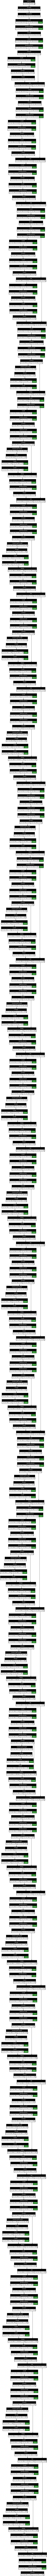

In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenet =  tf.keras.applications.EfficientNetV2B3(
    include_top=False,             # Esclude il classificatore finale
    input_shape=(96, 96, 3),       # Dimensioni di input
    weights="imagenet",            # Pesi preaddestrati su ImageNet
    input_tensor=None,             # Tensor di input (lascia None per usare input_shape)
    pooling=None,                  # Nessun pooling; specifica 'avg' per GlobalAveragePooling
    classes=8,                     # Numero di classi (non usato se include_top=False)
    classifier_activation="softmax" # Attivazione del classificatore (non usato se include_top=False)
)


# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

"""
# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
inputs = augmentation(inputs)
"""

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)


# Add layer normalizatiFinal_Project.ipynbon
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Lion optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer= tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

In [ ]:

# Example usage
input_shape = (96, 96, 3)  # Replace with your input shape
output_units = 8

# Freeze the MobileNet layers to retain the pretrained features
mobilenet.trainable = False

# Define the input layer
inputs = tf.keras.Input(shape=input_shape)

# Pass the input through MobileNet
x = mobilenet(inputs)

# Add global average pooling to flatten MobileNet's output
x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Dense layer 0
x = tfkl.Dense(256, activation='relu')(x)  # units_dense_0 = 256
# No batch normalization after dense_0 (batch_norm_after_dense_0=False)
x = tfkl.Dropout(0.3)(x)  # dropout_rate_0 = 0.3

# Dense layer 1
x = tfkl.Dense(64, activation='relu')(x)  # units_dense_1 = 64
x = tfkl.BatchNormalization()(x)  # batch_norm_after_dense_1=True
x = tfkl.Dropout(0.4)(x)  # dropout_rate_1 = 0.4

# Dense layer 2
x = tfkl.Dense(512, activation='relu')(x)  # units_dense_2 = 512
x = tfkl.BatchNormalization()(x)  # batch_norm_after_dense_2=True
x = tfkl.Dropout(0.3)(x)  # dropout_rate_2 = 0.3

# Dense layer 3
x = tfkl.Dense(512, activation='relu')(x)  # units_dense_3 = 512
# No batch normalization after dense_3 (batch_norm_after_dense_3=False)
x = tfkl.Dropout(0.4)(x)  # dropout_rate_3 = 0.4

outputs = tfkl.Dense(output_units, activation='softmax')(x)

# Build and compile the model
best_model = tfk.Model(inputs, outputs)
best_model.compile(
    optimizer=tfk.optimizers.Adam(learning_rate=0.001),  # learning_rate = 0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )          # Replace with the number of output classes

# Summary of the model
best_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b3 (Functional)       │ (None, 3, 3, 1536)          │      12,930,622 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ avg_pool (GlobalAveragePooling2D)    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,642,886 (52.04 MB)

 Trainable params: 711,112 (2.71 MB)

 Non-trainable params: 12,931,774 (49.33 MB)

### Train First - Model


In [ ]:
# Train the model
best_model_hisy = best_model.fit(
    x=X_test_concat2,
    y=y_test_concat2,
    batch_size=64,
    epochs=6,
    validation_data=(X_test_aug2 , y_test_aug2),
    callbacks=[tfk.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max', patience=10,
        restore_best_weights=True
        )]
).history


import matplotlib.pyplot as plt

# Assuming `history` is the output of `model.fit()`
def plot_loss_curves(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()


plot_loss_curves(tl_history )

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
#model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
#tl_model.save(model_filename)

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)

Epoch 1/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.2961 - loss: 2.0715 - val_accuracy: 0.4261 - val_loss: 1.5445
Epoch 2/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4762 - loss: 1.4263 - val_accuracy: 0.4815 - val_loss: 1.4409
Epoch 3/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5263 - loss: 1.2960 - val_accuracy: 0.4965 - val_loss: 1.3914
Epoch 4/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5490 - loss: 1.2470 - val_accuracy: 0.5177 - val_loss: 1.3476
Epoch 5/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5644 - loss: 1.2104 - val_accuracy: 0.5274 - val_loss: 1.3177
Epoch 6/6
561/561 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5763 - loss: 1.1777 - val_accuracy: 0.5435 - val_loss: 1.2764


NameError: name 'tl_history' is not defined

In [ ]:
# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(best_model_hisy['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
#model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
#tl_model.save(model_filename)

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
best_model.save(model_filename)

Final validation accuracy: 54.35%


In [ ]:
!pip install keras-tuner
from  keras_tuner import HyperModel
from  keras_tuner.tuners import Hyperband

# Define a custom HyperModel for automatic model order selection
class ModelOrderHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        inputs = tfk.Input(shape=self.input_shape, name='input_layer')

        # MobileNetV3Small as a feature extractor
        mobilenet = tf.keras.applications.MobileNetV3Small(
            input_shape=self.input_shape,
            include_top=False,
            weights='imagenet'
        )
        mobilenet.trainable = False  # Freeze the base model
        x = mobilenet(inputs)

        # Global Average Pooling
        x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

        # Add batch normalization
        if hp.Boolean('batch_norm_before_dense'):
            x = tfkl.BatchNormalization(name='batch_norm')(x)

        # Dynamically add dense layers
        for i in range(hp.Int('num_dense_layers', 1, 5)):
            x = tfkl.Dense(
                units=hp.Choice(f'units_dense_{i}', [64, 128, 256, 512]),
                activation='gelu',
                name=f'dense_{i}'
            )(x)
            if hp.Boolean(f'batch_norm_after_dense_{i}'):
                x = tfkl.BatchNormalization(name=f'batch_norm_{i}')(x)
            x = tfkl.Dropout(
                rate=hp.Float(f'dropout_rate_{i}', 0.2, 0.5, step=0.1),
                name=f'dropout_{i}'
            )(x)

        # Output layer
        outputs = tfkl.Dense(
            self.num_classes, activation='softmax', name='output'
        )(x)

        # Define and compile the model
        model = Model(inputs=inputs, outputs=outputs, name='model')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model


# Set up Hyperband Tuner
input_shape = (96, 96, 3)
num_classes = 8

hypermodel = ModelOrderHyperModel(input_shape, num_classes)

tuner = Hyperband(
    hypermodel,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='hyperband_dir',
    project_name='model_order_selection'
)

# Callback for early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

# Perform the search
tuner.search(
   X_test_concat2, y_test_concat2,
    validation_data=(X_test_aug2, y_test_aug2),
    epochs=50,
    callbacks=[early_stop],
    batch_size=32
)

# Retrieve the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    batch_size=32
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


### Test the First - Model


In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = best_model.predict(X_test_aug4)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug4.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del best_model

### First Fine - Tuning


In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_54.35.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('efficientnetv2-b3').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('efficientnetv2-b3').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat_d,
    y = y_test_concat_d,
    batch_size = 32,
    epochs = 7,
    validation_data = (X_test_aug2, y_test_aug2),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Generate predictions on the test set and print a classification report
y_pred = tl_model.predict(X_test_aug6)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug6.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del tl_model


# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

del ft_model

Epoch 1/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 139s 69ms/step - accuracy: 0.1938 - loss: 2.0580 - val_accuracy: 0.1998 - val_loss: 2.0142
Epoch 2/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.1929 - loss: 2.0207 - val_accuracy: 0.1998 - val_loss: 2.0120
Epoch 3/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.1963 - loss: 2.0157 - val_accuracy: 0.1998 - val_loss: 2.0130
Epoch 4/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.1968 - loss: 2.0122 - val_accuracy: 0.1998 - val_loss: 2.0121
Epoch 5/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.1960 - loss: 2.0105 - val_accuracy: 0.1998 - val_loss: 2.0118
Epoch 6/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.1969 - loss: 2.0095 - val_accuracy: 0.1998 - val_loss: 2.0118
Epoch 7/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.1974 - loss: 2.0092 - val_accuracy: 0.1998 - val_loss: 2.0118
Final validation accuracy: 19.98%


NameError: name 'tl_model' is not defined

### Second Fine - Tuning

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/content/Blood_Cells_MobileNetV3S_72.21.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

ValueError: File not found: filepath=/content/Blood_Cells_MobileNetV3S_72.21.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

0 input_layer_17 False
1 convnext_xlarge_prestem_normalization False
2 convnext_xlarge_stem False
3 convnext_xlarge_stage_0_block_0_depthwise_conv False
4 convnext_xlarge_stage_0_block_0_layernorm False
5 convnext_xlarge_stage_0_block_0_pointwise_conv_1 False
6 convnext_xlarge_stage_0_block_0_gelu False
7 convnext_xlarge_stage_0_block_0_pointwise_conv_2 False
8 convnext_xlarge_stage_0_block_0_layer_scale False
9 convnext_xlarge_stage_0_block_0_identity False
10 convnext_xlarge_stage_0_block_1_depthwise_conv False
11 convnext_xlarge_stage_0_block_1_layernorm False
12 convnext_xlarge_stage_0_block_1_pointwise_conv_1 False
13 convnext_xlarge_stage_0_block_1_gelu False
14 convnext_xlarge_stage_0_block_1_pointwise_conv_2 False
15 convnext_xlarge_stage_0_block_1_layer_scale False
16 convnext_xlarge_stage_0_block_1_identity False
17 convnext_xlarge_stage_0_block_2_depthwise_conv False
18 convnext_xlarge_stage_0_block_2_layernorm False
19 convnext_xlarge_stage_0_block_2_pointwise_conv_1 False


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_17 (InputLayer)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 351,632,410 (1.31 GB)

 Trainable params: 1,911,048 (7.29 MB)

 Non-trainable params: 346,820,864 (1.29 GB)

 Optimizer params: 2,900,498 (11.06 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.915484 to fit



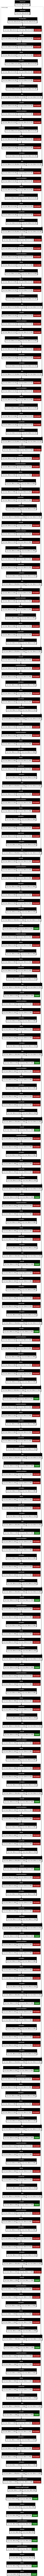

In [ ]:
# Set the number of layers to freeze
N = 70

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Enable mixed precision
tfk.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_aug5,
    y = X_test_aug5,
    batch_size = 64,
    epochs = 5,
    validation_data = (X_test_aug6, y_test_aug6),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=False)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug2)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug2.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


del ft_model

NameError: name 'ft_model' is not defined

### Submit Section


In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenetf = tf.keras.applications.EfficientNetV2B3(
    include_top=False,
    input_shape=(96, 96, 3),
    weights="imagenet",
    input_tensor=None,
    pooling=False,
    classes=8,
    classifier_activation="softmax",
    name="efficientnetv2-b3",
)

# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenetf.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenetf(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 un load_data("training_set.npz")its and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tlf_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Adam optimiser
tlf_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture

# Load the saved weights
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras.weights.h5'  # replace <final_val_accuracy> with the actual accuracy
tlf_model.load_weights(model_filename)

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
tlf_model.save(model_filename)



In [ ]:
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Blood_Cells_MobileNetV3S_ 96.28.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Writing model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} model.py Blood_Cells_MobileNetV3S_96.28.keras

  adding: model.py (deflated 54%)
  adding: Blood_Cells_MobileNetV3S_96.28.keras (deflated 7%)
